In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [304]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\titanic_dataset .csv")  #reading the data 

# Exploratory Data Analysis

In [305]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [306]:
df.shape     #We got the structure of the data.It has 891 rows and 12 columns

(891, 12)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [308]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [309]:
df.isna().sum()    #checking for NaN values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Preprocessing

In [310]:
features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for features in features_nan:
    print("{}:{} % missing values".format(features,np.round(df[features].isnull().mean(),4)))

Cabin:0.771 % missing values
Embarked:0.0022 % missing values


In [311]:
def replace_cat_feature(df, features_nan):
    data = df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df = replace_cat_feature(df,features_nan)

df[features_nan].isnull().sum()

Cabin       0
Embarked    0
dtype: int64

In [312]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [313]:
numerical_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

for features in numerical_with_nan:
    print("{}:{} % missing values".format(features,np.round(df[features].isnull().mean(),4)))

Age:0.1987 % missing values


In [314]:
for feature in numerical_with_nan:
    #Replacing the values with median since there are lot of outliers
    median_value = df[feature].median()
    
    #Creating a new feature to capture nan value
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value, inplace=True)
    
df[numerical_with_nan].isnull().sum()

Age    0
dtype: int64

In [315]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,0


In [316]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Agenan         0
dtype: int64

In [317]:
df1=df.drop(['PassengerId'],axis=1)

In [318]:
# Creating a list of numerical values
numerical_features = [feature for feature in df1.columns if df1[feature].dtypes != 'O']

print("The length of numerical variables: ", len(numerical_features))

#display the numerical variables
df1[numerical_features].head()

The length of numerical variables:  7


,Survived,Pclass,Age,SibSp,Parch,Fare,Agenan
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,0


In [319]:
#Numerical Variables are usually of two types - Continuous and discrete

discrete_feature = [feature for feature in numerical_features if len(df1[feature].unique())<25]

print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 5


In [320]:
num_features = []

for feature in num_features:
    df1[feature]=np.log(df1[feature])

In [321]:
discrete_feature

['Survived', 'Pclass', 'SibSp', 'Parch', 'Agenan']

In [322]:
df[discrete_feature].head()

,Survived,Pclass,SibSp,Parch,Agenan
0,0,3,1,0,0
1,1,1,1,0,0
2,1,3,0,0,0
3,1,1,1,0,0
4,0,3,0,0,0


In [323]:
continuous_feature = [feature for feature in numerical_features  if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 2


In [324]:
df[continuous_feature].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [325]:
numerical_features

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Agenan']

In [326]:
num_features = ['Age','Fare']

for feature in num_features:
    df1[feature]=np.log(df1[feature])

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [327]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenan
0,0,3,"Braund, Mr. Owen Harris",male,3.091042,1,0,A/5 21171,1.981001,Missing,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.637586,1,0,PC 17599,4.266662,C85,C,0
2,1,3,"Heikkinen, Miss. Laina",female,3.258097,0,0,STON/O2. 3101282,2.070022,Missing,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.555348,1,0,113803,3.972177,C123,S,0
4,0,3,"Allen, Mr. William Henry",male,3.555348,0,0,373450,2.085672,Missing,S,0


In [328]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_feature

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [329]:
from sklearn.preprocessing import LabelEncoder
for feature in categorical_feature:
    le = LabelEncoder()   
    df1[feature]= le.fit_transform(df1[feature])

In [330]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenan
0,0,3,108,1,3.091042,1,0,523,1.981001,146,3,0
1,1,1,190,0,3.637586,1,0,596,4.266662,81,0,0
2,1,3,353,0,3.258097,0,0,669,2.070022,146,3,0
3,1,1,272,0,3.555348,1,0,49,3.972177,55,3,0
4,0,3,15,1,3.555348,0,0,472,2.085672,146,3,0


In [331]:
df1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Agenan'],
      dtype='object')

In [332]:
df1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Agenan      0
dtype: int64

In [333]:
feature_scale = [feature for feature in df1.columns if feature not in ['Fare']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1[feature_scale])

MinMaxScaler()

In [334]:
data = pd.concat([df[['PassengerId']].reset_index(drop=True),pd.DataFrame(scaler.transform(df1[feature_scale]),columns=feature_scale)],axis=1)

In [335]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Agenan
0,1,0.0,1.0,0.121348,1.0,0.754076,0.125,0.000000,0.769118,0.993197,1.000000,0.0
1,2,1.0,0.0,0.213483,0.0,0.858189,0.125,0.000000,0.876471,0.551020,0.000000,0.0
2,3,1.0,1.0,0.396629,0.0,0.785899,0.000,0.000000,0.983824,0.993197,1.000000,0.0
3,4,1.0,0.0,0.305618,0.0,0.842523,0.125,0.000000,0.072059,0.374150,1.000000,0.0
4,5,0.0,1.0,0.016854,1.0,0.842523,0.000,0.000000,0.694118,0.993197,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,0.5,0.615730,1.0,0.793088,0.000,0.000000,0.148529,0.993197,1.000000,0.0
887,888,1.0,0.0,0.340449,0.0,0.726149,0.000,0.000000,0.020588,0.204082,1.000000,0.0
888,889,0.0,1.0,0.464045,0.0,0.800016,0.125,0.333333,0.992647,0.993197,1.000000,1.0
889,890,1.0,0.0,0.091011,1.0,0.785899,0.000,0.000000,0.011765,0.408163,0.000000,0.0


After feature selection and scaling this is the final product of the data set.

# Hold-out Method

In [336]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Cabin', 'Embarked', 'Agenan'],
      dtype='object')

In [337]:
y=data['Survived']
x=data.drop(['PassengerId', 'PassengerId', 'Survived'],axis=1)

In [338]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [339]:
from sklearn.model_selection import train_test_split

In [340]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Agenan
0,1.0,0.121348,1.0,0.754076,0.125,0.0,0.769118,0.993197,1.0,0.0
1,0.0,0.213483,0.0,0.858189,0.125,0.0,0.876471,0.551020,0.0,0.0
2,1.0,0.396629,0.0,0.785899,0.000,0.0,0.983824,0.993197,1.0,0.0
3,0.0,0.305618,0.0,0.842523,0.125,0.0,0.072059,0.374150,1.0,0.0
4,1.0,0.016854,1.0,0.842523,0.000,0.0,0.694118,0.993197,1.0,0.0


In [341]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [342]:
x_train,x_test

(     Pclass      Name  Sex       Age  SibSp     Parch    Ticket     Cabin  \
 331     0.0  0.715730  1.0  0.892502  0.000  0.000000  0.029412  0.380952   
 733     0.5  0.094382  1.0  0.762544  0.000  0.000000  0.335294  0.993197   
 382     1.0  0.911236  1.0  0.825453  0.000  0.000000  0.977941  0.993197   
 704     1.0  0.366292  1.0  0.785899  0.125  0.000000  0.585294  0.993197   
 813     1.0  0.025843  0.0  0.506571  0.500  0.333333  0.489706  0.993197   
 ..      ...       ...  ...       ...    ...       ...       ...       ...   
 106     1.0  0.813483  0.0  0.745214  0.000  0.000000  0.435294  0.993197   
 270     0.0  0.140449  1.0  0.800016  0.000  0.000000  0.069118  0.993197   
 860     1.0  0.365169  1.0  0.872664  0.250  0.000000  0.586765  0.993197   
 435     0.0  0.160674  0.0  0.667976  0.125  0.333333  0.048529  0.319728   
 102     0.0  0.964045  1.0  0.745214  0.000  0.166667  0.613235  0.666667   
 
      Embarked  Agenan  
 331       1.0     0.0  
 733       1

In [343]:
y_train,y_test

(331    0.0
 733    0.0
 382    0.0
 704    0.0
 813    0.0
       ... 
 106    1.0
 270    0.0
 860    0.0
 435    1.0
 102    0.0
 Name: Survived, Length: 712, dtype: float64,
 709    1.0
 439    0.0
 840    0.0
 720    1.0
 39     1.0
       ... 
 433    0.0
 773    0.0
 25     1.0
 84     1.0
 10     1.0
 Name: Survived, Length: 179, dtype: float64)

# kNN

In [344]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
metric=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

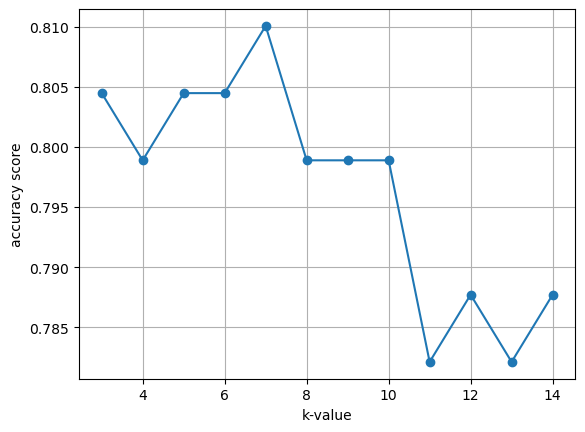

In [345]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k-value')
plt.ylabel('accuracy score')
plt.grid()

k-value is highest at 7.Therefore,taking k as 7.

In [346]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
model_knn=classifier.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)

In [347]:
y_pred_knn

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0.])

In [348]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('Precision = ',precision_score(y_test,y_pred_knn))
print('Recall = ',recall_score(y_test,y_pred_knn))
print('f1-score = ',f1_score(y_test,y_pred_knn))

Accuracy =  0.8100558659217877
Precision =  0.8333333333333334
Recall =  0.6756756756756757
f1-score =  0.746268656716418


In [349]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_knn)

array([[95, 10],
       [24, 50]], dtype=int64)

# SVM

In [350]:
from sklearn.svm import SVC
svm_classifier=SVC(kernel='linear')
model_svm=svm_classifier.fit(x_train,y_train)
model_svm

SVC(kernel='linear')

In [351]:
y_pred_svm=model_svm.predict(x_test)

In [352]:
y_pred_svm

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1.])

In [353]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))
print('Precision = ',precision_score(y_test,y_pred_svm))
print('Recall = ',recall_score(y_test,y_pred_svm))
print('f1-score = ',f1_score(y_test,y_pred_svm))

Accuracy =  0.7821229050279329
Precision =  0.7536231884057971
Recall =  0.7027027027027027
f1-score =  0.7272727272727273


In [354]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm)

array([[88, 17],
       [22, 52]], dtype=int64)

# Cross-Validation

# k-fold validation cross validation

In [355]:
from sklearn.model_selection import KFold

In [356]:
kfold_validator=KFold(10)

In [357]:
for train_index,test_index in kfold_validator.split(x,y):
    print("Training index: ",train_index)
    print("Testing_index: ",test_index)


Training index:  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [358]:
from sklearn.model_selection import cross_val_score

In [359]:
cv_result=cross_val_score(model_knn,x,y,cv=kfold_validator)

In [360]:
cv_result

array([0.75555556, 0.76404494, 0.78651685, 0.83146067, 0.82022472,
       0.76404494, 0.7752809 , 0.75280899, 0.85393258, 0.83146067])

In [361]:
average_knn=np.mean(cv_result)

In [362]:
average_knn

0.7935330836454432

In [363]:
cv_result1=cross_val_score(model_svm,x,y,cv=kfold_validator)

In [364]:
cv_result1

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [365]:
average_svm=np.mean(cv_result1)

In [366]:
average_svm

0.786729088639201

# Stratified K-Fold

In [367]:
from sklearn.model_selection import StratifiedKFold

In [368]:
skfold_validator=StratifiedKFold(n_splits=10)

In [369]:
for train_index,test_index in skfold_validator.split(x,y):
    print("Training index: ",train_index)
    print("Testing_index: ",test_index)


Training index:  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [370]:
skcv_result=cross_val_score(model_knn,x,y,cv=skfold_validator)

In [371]:
skcv_result

array([0.74444444, 0.73033708, 0.7752809 , 0.84269663, 0.83146067,
       0.78651685, 0.78651685, 0.76404494, 0.80898876, 0.82022472])

In [372]:
average_knn1=np.mean(skcv_result)

In [373]:
average_knn1

0.7890511860174781

In [374]:
skcv_result1=cross_val_score(model_svm,x,y,cv=skfold_validator)

In [375]:
average_svm1=np.mean(skcv_result1)

In [376]:
average_svm1

0.786729088639201

# Conclusion

The metric scores obtained after fitting kNN model are:
Accuracy =  0.8100558659217877
Precision =  0.8333333333333334
Recall =  0.6756756756756757
f1-score =  0.746268656716418

The metric scores obtained after fitting SVM model are:
Accuracy =  0.7821229050279329
Precision =  0.7536231884057971
Recall =  0.7027027027027027
f1-score =  0.7272727272727273

From the above,we can see that kNN model has more accuracy when compared to SVM model.Hence,kNN gives a good model.

By using k-fold cross validation method and stratified k-fold cross-validation method,we get that kNN is a good model with higher accuracy.
Using k-fold:
    Accuracy for kNN model= 0.7935330836454432
    Accuracy for SVM model= 0.786729088639201
More accuracy score for kNN model

Using Stratified k-fold:
    Accuracy for kNN model= 0.7890511860174781
    Accuracy for SVM model= 0.786729088639201
More accuracy for kNN model.

But,they have only slight difference between their accuracies.

Hence,we can conclude that kNN is the best model for this data.